In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
from operator import add
from scipy.stats import pearsonr

In [46]:
class CGR():
    K = 0
    c = None
    h = ""
    Data = ""
    i = 0
    def __init__(self,a):
        self.i=a
    def read_fasta(self,loc):
        f = open(loc)
        s1 = f.read()
        data = "".join(s1.split("\n")[1:])
        head = "".join(s1.split("\n")[0:1])
        return data,head
    
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(self.Data)-(k-1)):
            d[sequence[i:i+k]] +=1
        d.pop("N",None)
        return d

    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(self.Data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx +=  maxx/2
                elif char == "C":
                    posy += maxy/2
                elif char == "G":
                    posx += maxx/2
                    posy += maxy/2
                maxx /= 2
                maxy /= 2

            chaos[int(posy-1)][int(posx-1)] = value
            maxx = array_size
            maxy = array_size
            posx = 1
            posy = 1
        return chaos

    def load_fasta(self,loc,k):
        data,head = self.read_fasta(loc)
        self.Data = data
        f4 = self.count_kmers(data, k)
        f4_prob = self.probabilities(f4, k)
        chaos_k4 = self.chaos_game_representation(f4_prob, k)
        self.c = chaos_k4
        self.h = head
        return chaos_k4
    
    def show(self):
        pylab.figure(figsize=(12,12))
        pylab.title('CGR of '+str(self.K)+'-mers for '+self.h[2:])
        pylab.imshow(self.c, cmap=cm.gray_r)
        pylab.savefig(str(self.i)+".PNG")
        pylab.show()

In [47]:
B = CGR(1)
cg = B.load_fasta("seq_1.fasta",7)
C = CGR(2)
cg_1 = C.load_fasta("seq_2.fasta",7)

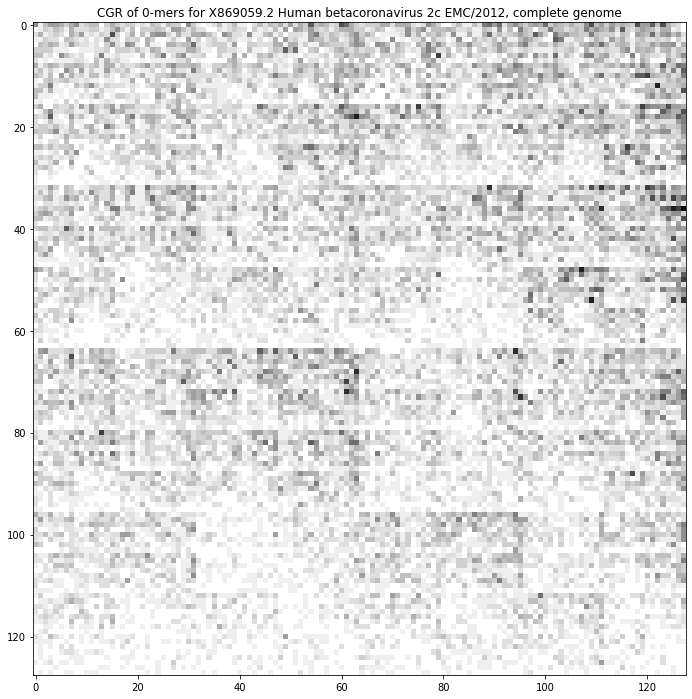

In [48]:
x = B.show()

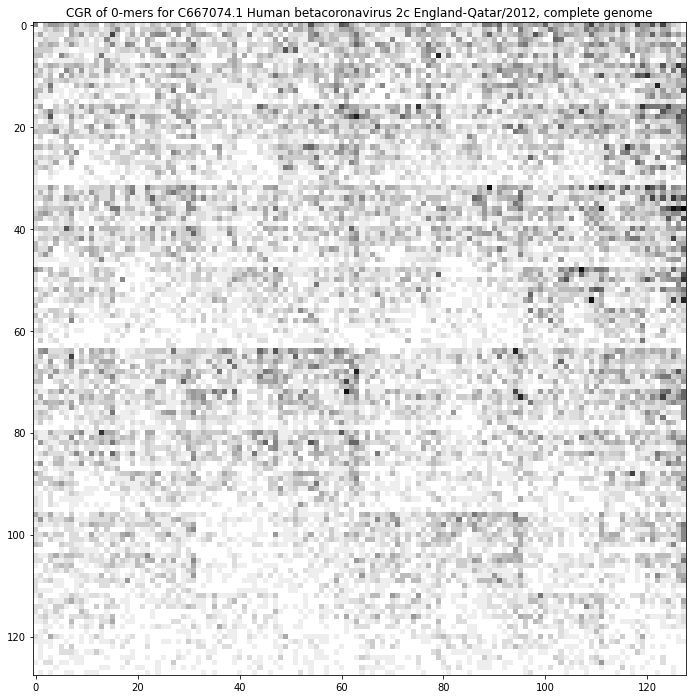

In [49]:
C.show()

In [50]:
np.array(cg).shape

NameError: name 'np' is not defined

In [51]:
a = max(cg[0])
b = max(cg[1])
CG = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg[0],cg[1]))
a = max(cg_1[0])
b = max(cg_1[1])
CG_1 = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg_1[0],cg_1[1]))

In [10]:
CG_1

[0.7977240352174657,
 1.0540925533894596,
 1.9227505550564006,
 1.6636336037952488,
 2.233808181088741,
 1.9462473604038073,
 1.1763666026534345,
 2.4515507357795,
 1.6907353011591904,
 1.5504968249049733,
 1.5795409127178361,
 1.9227505550564006,
 1.9227505550564006,
 1.0540925533894596,
 1.5795409127178361,
 2.2133661917969873,
 2.837341193882937,
 1.5504968249049733,
 1.1763666026534345,
 2.1719050893562812,
 0.30151134457776363,
 1.8748737331221839,
 1.8504708655481241,
 1.9227505550564006,
 2.1719050893562812,
 1.8504708655481241,
 1.2143918126978106,
 2.634272943222463,
 2.634272943222463,
 2.1081851067789192,
 1.6636336037952488,
 2.4329389468689753,
 1.5208981928884369,
 1.4907119849998596,
 0.30151134457776363,
 0.4264014327112209,
 1.6080605044147394,
 1.0963668190985176,
 1.8748737331221839,
 1.6080605044147394,
 1.5208981928884369,
 1.5208981928884369,
 0.0,
 1.8748737331221839,
 1.2143918126978106,
 1.5504968249049733,
 1.2143918126978106,
 2.1719050893562812,
 1.251261989

In [18]:
CG

[0.7977240352174656,
 1.044465935734187,
 1.834021909257456,
 1.5954480704349312,
 2.1320071635561044,
 1.8586407545691703,
 1.1281521496355322,
 2.335496832484569,
 1.6236882817719773,
 1.4770978917519928,
 1.507556722888818,
 1.834021909257456,
 1.834021909257456,
 1.0,
 1.507556722888818,
 2.1105794120443453,
 2.696799449852968,
 1.7837651700316894,
 1.1281521496355322,
 2.0670576365276494,
 0.30151134457776363,
 1.7837651700316894,
 1.7580981459830651,
 1.834021909257456,
 2.0670576365276494,
 1.7580981459830651,
 1.1677484162422844,
 2.5045413298101655,
 2.5045413298101655,
 2.0,
 1.6236882817719773,
 2.0670576365276494,
 1.4459976109624424,
 1.414213562373095,
 0.30151134457776363,
 0.4264014327112209,
 1.5374122295716146,
 1.044465935734187,
 1.4770978917519928,
 1.834021909257456,
 1.4459976109624424,
 1.4459976109624424,
 0.0,
 1.7837651700316894,
 1.1677484162422844,
 1.4770978917519928,
 1.1677484162422844,
 2.0670576365276494,
 1.2060453783110545,
 2.486326242032244,
 0.738

In [61]:
from scipy.stats import spearmanr
corr, _ = spearmanr(CG,CG_1)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.985


In [14]:
f = open("seq_1.fasta")
s1 = f.read()
data_1 = "".join(s1.split("\n")[1:])
f = open("seq_2.fasta")
s1 = f.read()
data_2 = "".join(s1.split("\n")[1:])

In [15]:
sum=0
for i in range(len(data_2)):
    if data_1[i]==data_2[i]:
        sum+=1
sum/=len(data_1)
print(sum)

0.9877817988645041


In [57]:
import cv2
from skimage.metrics import structural_similarity as ssim
imageA = cv2.imread("first.PNG")
imageB = cv2.imread("2.PNG")

In [63]:
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
(score,_) = ssim(grayA, grayB, full=True)

In [64]:
score

0.975703881610875

In [74]:
pip install SSIM-PIL

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [78]:
from SSIM_PIL import compare_ssim
from PIL import Image

image1 = Image.open('F.PNG')
image2 = Image.open('S.PNG')
value = compare_ssim(image1, image2)
print(value)

No module named 'pyopencl'. cl12 version by Christoph Gohlke for windows is recommended: https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyopencl
0.819606435498014
